<a href="https://colab.research.google.com/github/ashish-00123/Air-Quality-Prediction/blob/main/Predicting_Air_Quality_Index_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving AQI-and-Lat-Long-of-Countries.csv to AQI-and-Lat-Long-of-Countries.csv


In [ ]:
import pandas as pd
train = pd.read_csv("AQI-and-Lat-Long-of-Countries.csv")
train.head()


,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
0,51,1,36,0,51,44.7444,44.2031
1,41,1,5,1,41,-5.2900,-44.4900
2,41,1,5,1,41,-11.2958,-41.9869
3,66,1,39,2,66,37.1667,15.1833
4,34,1,34,0,20,53.0167,20.8833


In [ ]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

#CREATING MODEL
m1= RandomForestRegressor()


train1= train.drop(['AQI Value'], axis=1)

target= train['AQI Value']

print(train1)
print(target)
#FITTING THE MODEL
m1.fit(train1, target)


       CO AQI Value  Ozone AQI Value  NO2 AQI Value  PM2.5 AQI Value      lat  \
0                 1               36              0               51  44.7444   
1                 1                5              1               41  -5.2900   
2                 1                5              1               41 -11.2958   
3                 1               39              2               66  37.1667   
4                 1               34              0               20  53.0167   
...             ...              ...            ...              ...      ...   
16690             1               34              5               54  37.5516   
16691             1               39              1               71  49.0650   
16692             1               39              1               71  36.3385   
16693             1               20              5               50  48.7786   
16694             1               44              2               71  40.1241   

           lng  
0      44.

RandomForestRegressor()

In [ ]:
m1.score(train1, target)*100

# predicting the model with other values (testing the data)
prediction_result= m1.predict([[1, 10, 5, 11, 10, 5]])

print(prediction_result)

[10.09]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# Adaboost model
# importing module

from sklearn.ensemble import AdaBoostRegressor


# defining model
m2 = AdaBoostRegressor()

# Fitting the model
m2.fit(train1, target)

'''AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)'''

m2.score(train1, target)*100

# predicting the model with other values (testing the data)
# so AQI is 48.73051389
m2.predict([[1, 45, 67, 34, 5, 23]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


array([46.88459215])

In [ ]:
import pandas as pd
train = pd.read_csv("AQI-and-Lat-Long-of-Countries.csv")
train.head()


,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
0,51,1,36,0,51,44.7444,44.2031
1,41,1,5,1,41,-5.2900,-44.4900
2,41,1,5,1,41,-11.2958,-41.9869
3,66,1,39,2,66,37.1667,15.1833
4,34,1,34,0,20,53.0167,20.8833


In [ ]:
print("\nMissing values:\n", train.isnull().sum())



Missing values:
 AQI Value          0
CO AQI Value       0
Ozone AQI Value    0
NO2 AQI Value      0
PM2.5 AQI Value    0
lat                0
lng                0
dtype: int64


In [ ]:

# Split data into features and target
X = train.drop(['AQI Value'], axis=1)
y = train['AQI Value']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# 🎯 Evaluate Random Forest
rf_train_score = rf_model.score(X_train, y_train) * 100
rf_test_score = rf_model.score(X_test, y_test) * 100
print(f" Random Forest R² Score (Train): {rf_train_score:.2f}%")
print(f" Random Forest R² Score (Test): {rf_test_score:.2f}%")

 Random Forest R² Score (Train): 99.97%
 Random Forest R² Score (Test): 99.86%


In [ ]:
# Predict AQI for custom input
custom_input = [[1, 10, 5, 11, 10, 5]]
rf_prediction = rf_model.predict(custom_input)
print(" Random Forest AQI Prediction:", rf_prediction)

📈 Random Forest AQI Prediction: [9.9]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# Plot Feature Importances
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
importances = rf_model.feature_importances_
feature_names = X.columns

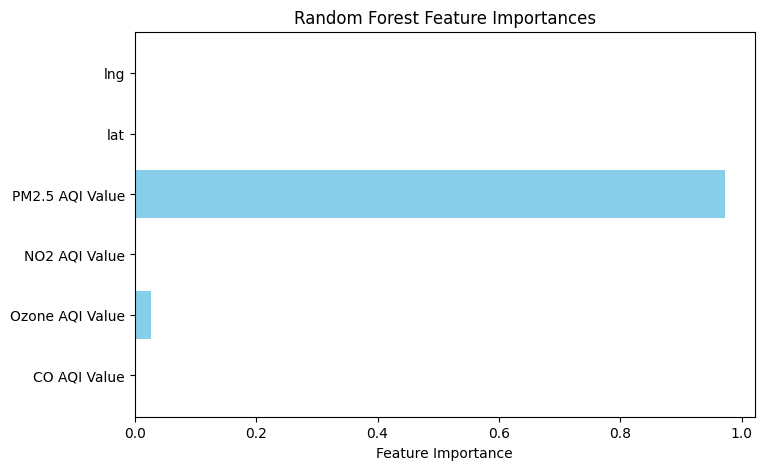

In [ ]:
plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()

In [ ]:
# AdaBoost Model
from sklearn.ensemble import AdaBoostRegressor
ada_model = AdaBoostRegressor(random_state=42)
ada_model.fit(X_train, y_train)

AdaBoostRegressor(random_state=42)

In [ ]:
# Evaluate AdaBoost
ada_train_score = ada_model.score(X_train, y_train) * 100
ada_test_score = ada_model.score(X_test, y_test) * 100
print(f"\n AdaBoost R² Score (Train): {ada_train_score:.2f}%")
print(f" AdaBoost R² Score (Test): {ada_test_score:.2f}%")


 AdaBoost R² Score (Train): 92.85%
 AdaBoost R² Score (Test): 92.11%


In [ ]:
# Predict with AdaBoost
ada_prediction = ada_model.predict([[1, 45, 67, 34, 5, 23]])
print(" AdaBoost AQI Prediction:", ada_prediction)

 AdaBoost AQI Prediction: [47.25352331]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# Predict using AdaBoost on test data
ada_preds = ada_model.predict(X_test)


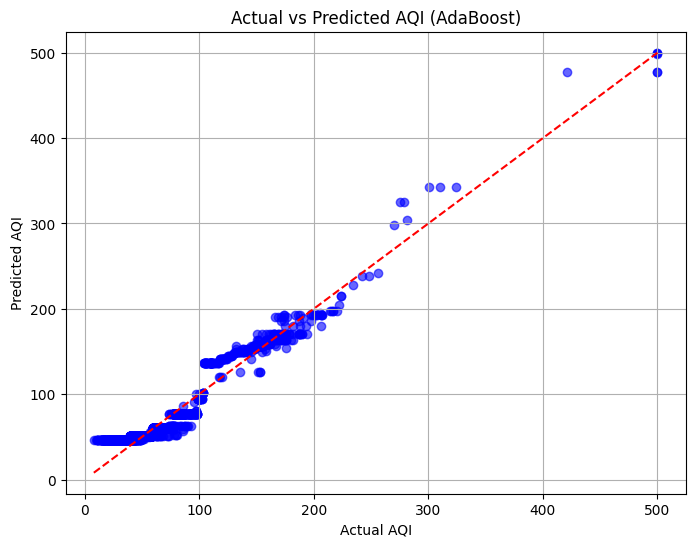

In [ ]:
# actual vs predicted aqi
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, ada_preds, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI (AdaBoost)")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions on test data
ada_preds = ada_model.predict(X_test)

# Error metrics
mae = mean_absolute_error(y_test, ada_preds)
mse = mean_squared_error(y_test, ada_preds)
rmse = mse ** 0.5
r2 = r2_score(y_test, ada_preds)

print(f"\n Evaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2 * 100:.2f}%")



 Evaluation Metrics:
MAE: 8.87
MSE: 130.85
RMSE: 11.44
R² Score: 92.11%
